#**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as c
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#**Loading Dataset**

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# **Dropping Uncessary Columns**

In [ ]:
data1=data
data1=data1.drop(['EmployeeNumber','Gender','Over18','StandardHours','EmployeeCount'],axis=1)
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
data1['Total_Satisfaction'] = (data1['EnvironmentSatisfaction'] + data1['JobInvolvement'] + data1['JobSatisfaction'] + data1['RelationshipSatisfaction'] +data1['WorkLifeBalance']) /5 


In [ ]:
data1=data1.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'],axis=1)

In [ ]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,94,2,Sales Executive,Single,5993,19479,8,Yes,11,3,0,8,0,6,4,0,5,2.2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,61,2,Research Scientist,Married,5130,24907,1,No,23,4,1,10,3,10,7,1,7,2.8
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,92,1,Laboratory Technician,Single,2090,2396,6,Yes,15,3,0,7,3,0,0,0,0,2.8
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,56,1,Research Scientist,Married,2909,23159,1,Yes,11,3,0,8,3,8,7,3,0,3.2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,40,1,Laboratory Technician,Married,3468,16632,9,No,12,3,1,6,3,2,2,2,2,2.6


#**Label Encoding**

In [ ]:
data1['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [ ]:
data1['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
data1['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
data1['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [ ]:
data1['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [ ]:
data1['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [ ]:
data1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
le=LabelEncoder()
data1['Attrition']=le.fit_transform(data1['Attrition'])
data1['BusinessTravel']=le.fit_transform(data1['BusinessTravel'])
data1['Department']=le.fit_transform(data1['Department'])
data1['EducationField']=le.fit_transform(data1['EducationField'])
#data1['Gender']=le.fit_transform(data1['Gender'])
data1['JobRole']=le.fit_transform(data1['JobRole'])
data1['MaritalStatus']=le.fit_transform(data1['MaritalStatus'])
data1['OverTime']=le.fit_transform(data1['OverTime'])

In [ ]:
data1['BusinessTravel'].value_counts()

2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

In [ ]:
data1['Department'].value_counts()

1    961
2    446
0     63
Name: Department, dtype: int64

In [ ]:
data1['EducationField'].value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

In [ ]:
data1['JobRole'].value_counts()

7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

In [ ]:
data1['MaritalStatus'].value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

In [ ]:
data1['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [ ]:
data1['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,1,2,1102,2,1,2,1,94,2,7,2,5993,19479,8,1,11,3,0,8,0,6,4,0,5,2.2
1,49,0,1,279,1,8,1,1,61,2,6,1,5130,24907,1,0,23,4,1,10,3,10,7,1,7,2.8
2,37,1,2,1373,1,2,2,4,92,1,2,2,2090,2396,6,1,15,3,0,7,3,0,0,0,0,2.8
3,33,0,1,1392,1,3,4,1,56,1,6,1,2909,23159,1,1,11,3,0,8,3,8,7,3,0,3.2
4,27,0,2,591,1,2,1,3,40,1,2,1,3468,16632,9,0,12,3,1,6,3,2,2,2,2,2.6


In [ ]:
data1[['BusinessTravel','Attrition']].groupby('BusinessTravel').mean()

,Attrition
BusinessTravel,
0,0.080000
1,0.249097
2,0.149569


In [ ]:
data1[['Department','Attrition']].groupby('Department').mean()

,Attrition
Department,
0,0.190476
1,0.138398
2,0.206278


In [ ]:
data1[['EducationField','Attrition']].groupby('EducationField').mean()

,Attrition
EducationField,
0,0.259259
1,0.146865
2,0.220126
3,0.135776
4,0.134146
5,0.242424


In [ ]:
data1[['JobRole','Attrition']].groupby('JobRole').mean()

,Attrition
JobRole,
0,0.068702
1,0.230769
2,0.239382
3,0.049020
4,0.068966
5,0.025000
6,0.160959
7,0.174847
8,0.397590


In [ ]:
data1[['MaritalStatus','Attrition']].groupby('MaritalStatus').mean()

,Attrition
MaritalStatus,
0,0.100917
1,0.124814
2,0.255319


In [ ]:
data1[['OverTime','Attrition']].groupby('OverTime').mean()

,Attrition
OverTime,
0,0.104364
1,0.305288


#**Data Visualization**

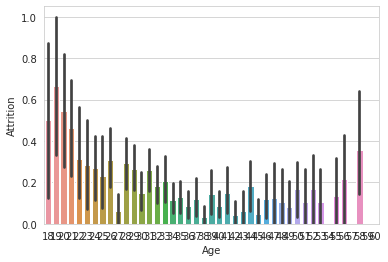

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='Age',y='Attrition',data=data1);
plt.show()

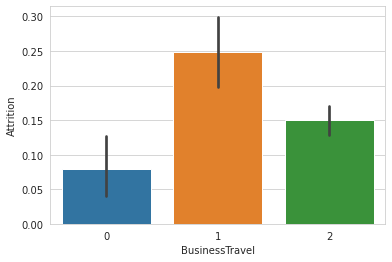

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='BusinessTravel',y='Attrition',data=data1);
plt.show()

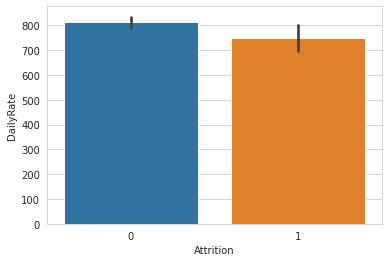

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='Attrition',y='DailyRate',data=data1);
plt.show()

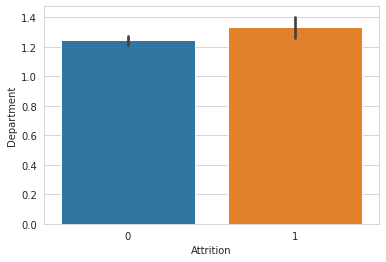

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='Attrition',y='Department',data=data1);
plt.show()

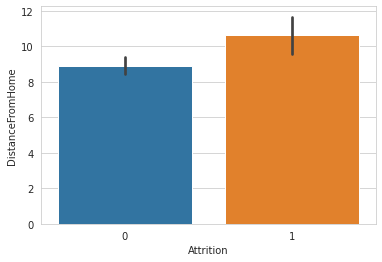

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='Attrition',y='DistanceFromHome',data=data1);
plt.show()

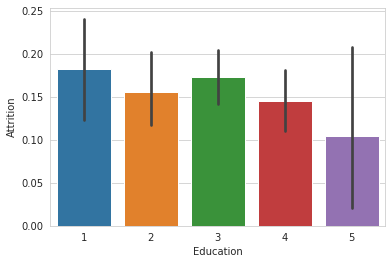

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='Education',y='Attrition',data=data1);
plt.show()

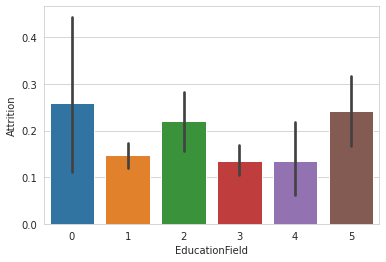

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='EducationField',y='Attrition',data=data1);
plt.show()

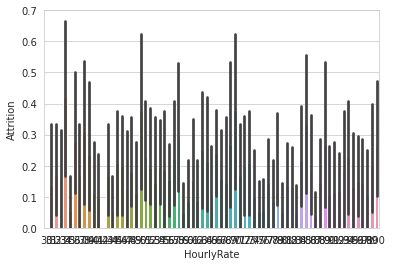

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='HourlyRate',y='Attrition',data=data1);
plt.show()

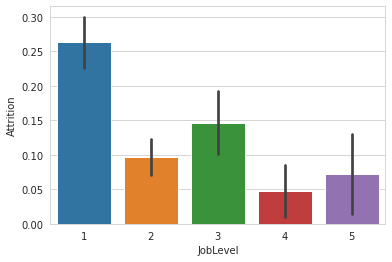

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='JobLevel',y='Attrition',data=data1);
plt.show()

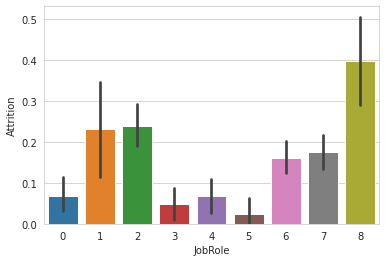

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='JobRole',y='Attrition',data=data1);
plt.show()

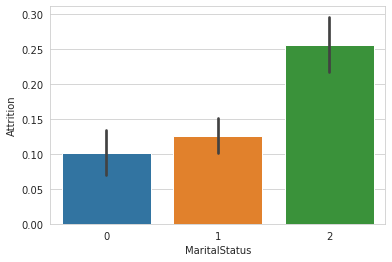

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='MaritalStatus',y='Attrition',data=data1);
plt.show()

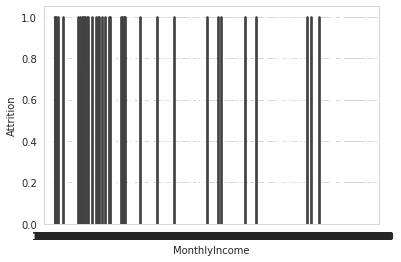

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='MonthlyIncome',y='Attrition',data=data1);
plt.show()

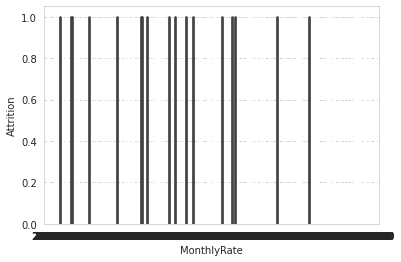

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='MonthlyRate',y='Attrition',data=data1);
plt.show()

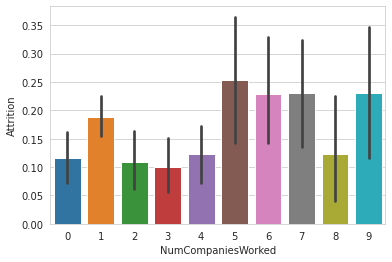

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='NumCompaniesWorked',y='Attrition',data=data1);
plt.show()

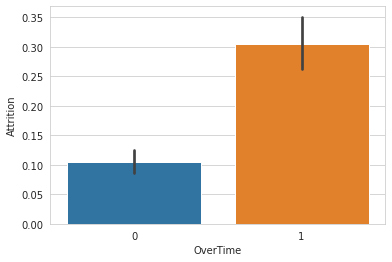

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='OverTime',y='Attrition',data=data1);
plt.show()

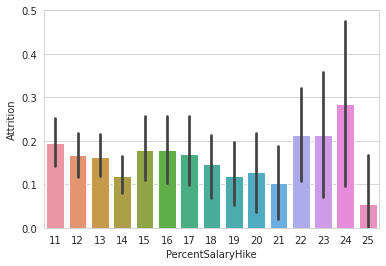

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='PercentSalaryHike',y='Attrition',data=data1);
plt.show()

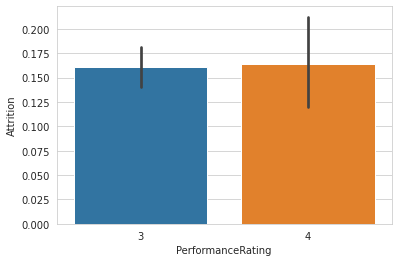

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='PerformanceRating',y='Attrition',data=data1);
plt.show()

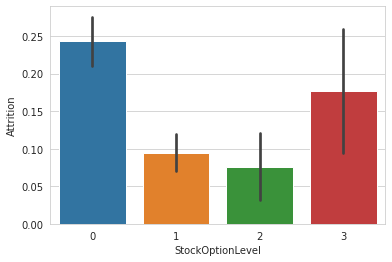

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='StockOptionLevel',y='Attrition',data=data1);
plt.show()

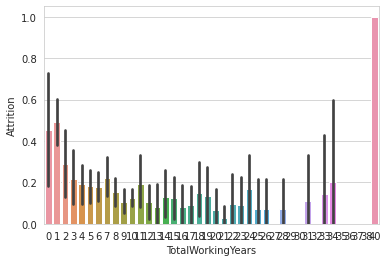

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='TotalWorkingYears',y='Attrition',data=data1);
plt.show()

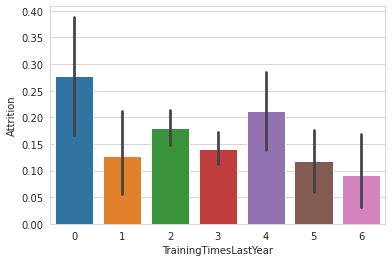

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='TrainingTimesLastYear',y='Attrition',data=data1);
plt.show()

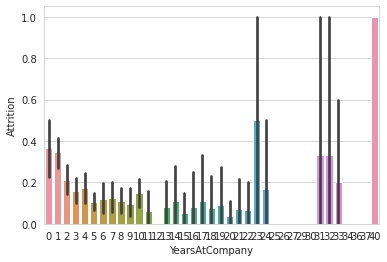

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='YearsAtCompany',y='Attrition',data=data1);
plt.show()

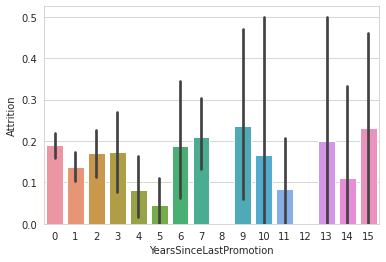

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='YearsSinceLastPromotion',y='Attrition',data=data1);
plt.show()

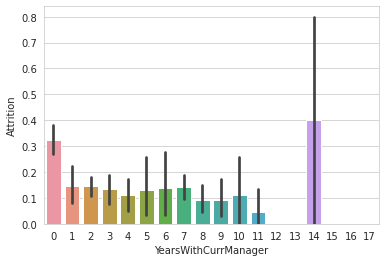

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='YearsWithCurrManager',y='Attrition',data=data1);
plt.show()

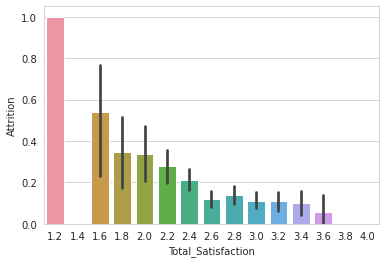

In [ ]:
sns.set_style("whitegrid");
sns.barplot(x='Total_Satisfaction',y='Attrition',data=data1);
plt.show()

# **Checking And Handling Outliers**

In [ ]:
data1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'HourlyRate',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Total_Satisfaction'],
      dtype='object')

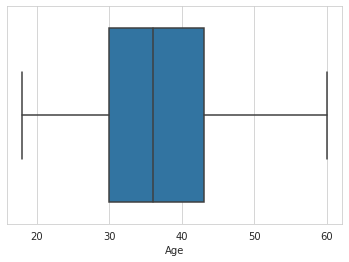

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='Age',data=data1);
plt.show()

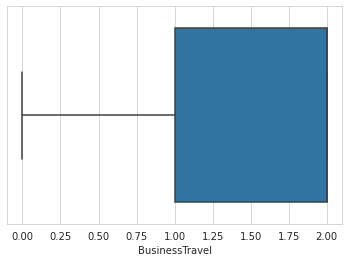

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='BusinessTravel',data=data1);
plt.show()

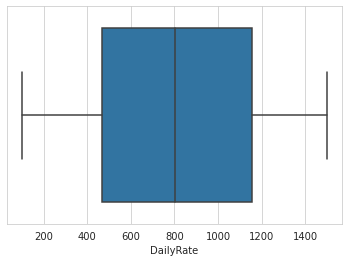

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='DailyRate',data=data1);
plt.show()

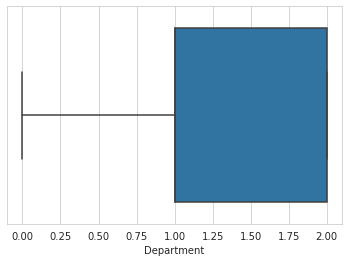

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='Department',data=data1);
plt.show()

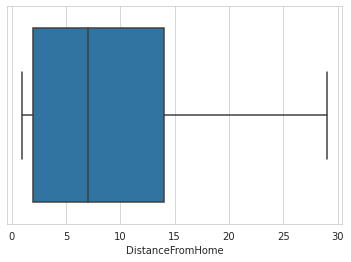

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='DistanceFromHome',data=data1);
plt.show()

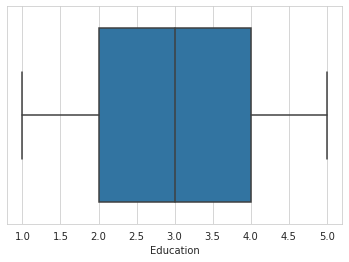

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='Education',data=data1);
plt.show()

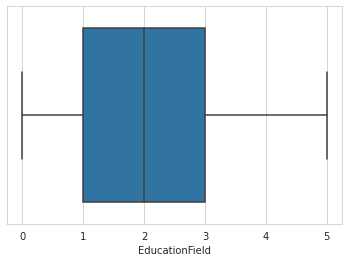

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='EducationField',data=data1);
plt.show()

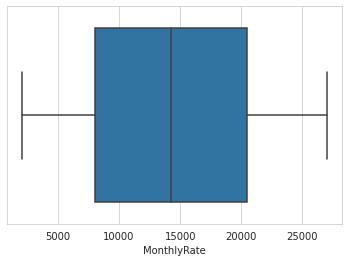

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='MonthlyRate',data=data1);
plt.show()

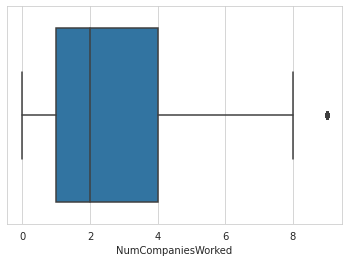

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='NumCompaniesWorked',data=data1);
plt.show()

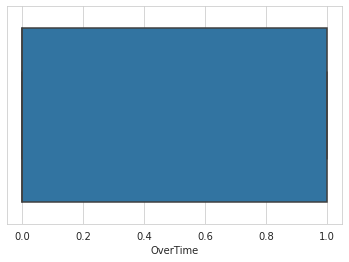

In [ ]:
#sns.set_style("whitegrid");
sns.boxplot(x='OverTime',data=data1);
plt.show()

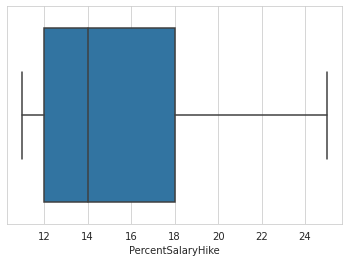

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='PercentSalaryHike',data=data1);
plt.show()

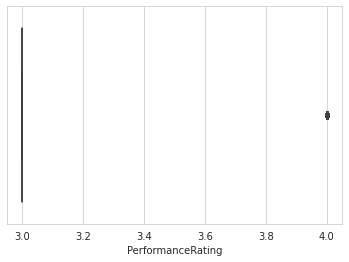

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='PerformanceRating',data=data1);
plt.show()

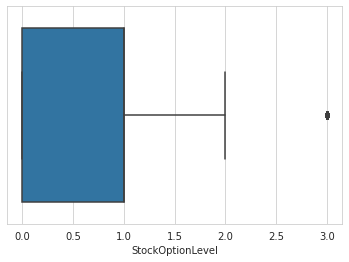

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='StockOptionLevel',data=data1);
plt.show()

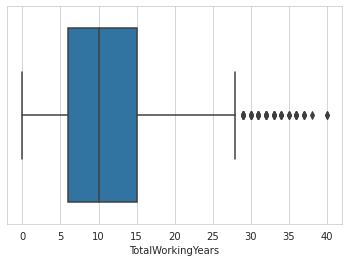

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='TotalWorkingYears',data=data1);
plt.show()

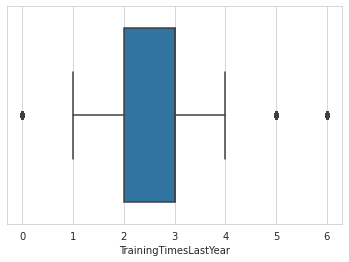

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='TrainingTimesLastYear',data=data1);
plt.show()

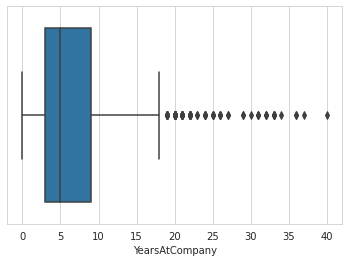

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='YearsAtCompany',data=data1);
plt.show()

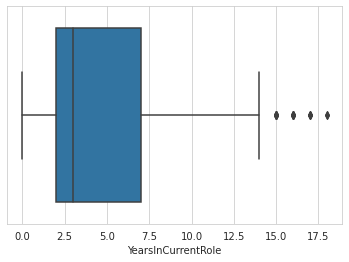

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='YearsInCurrentRole',data=data1);
plt.show()

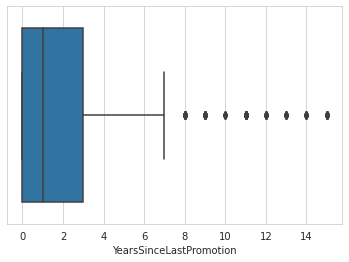

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='YearsSinceLastPromotion',data=data1);
plt.show()

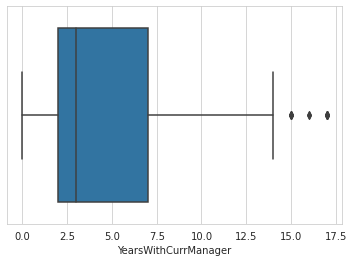

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='YearsWithCurrManager',data=data1);
plt.show()

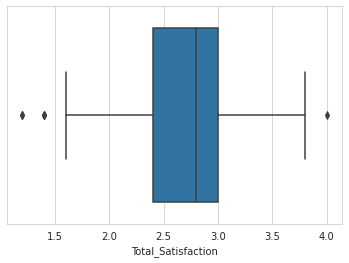

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='Total_Satisfaction',data=data1);
plt.show()

In [ ]:
z=np.abs(stats.zscore(data1))

In [ ]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  734,  744,  746,  749,  752,  799,  819,
        838,  861,  861,  864,  875,  875,  894,  914,  914,  918,  922,
        926,  926,  937,  956,  962,  976,  976, 1008, 1024, 1043, 1078,
       1078, 1086, 1086, 1093, 1111, 1116, 1116, 1135, 1138, 1138, 1156,
       1184, 1221, 1223, 1242, 1295, 1301, 1301, 1303, 1327, 1331, 1348,
       1351, 1391, 1401, 1414, 1430]), array([24, 23, 21, 23, 22, 23, 19, 19, 21, 23, 22, 23, 24, 19, 21, 23, 24,
       23, 19, 24, 21, 22, 23, 22, 24, 21, 23, 19, 21, 22, 23, 23, 24, 19,
       21, 21, 23, 23, 19, 22, 21, 21, 23, 21, 24, 23, 21, 19, 21, 23, 24,
     

In [ ]:
cleaned_data = data1[(z<3).all(axis=1)]

In [ ]:
cleaned_data.shape

(1382, 26)

In [ ]:
data1.shape

(1470, 26)

In [ ]:
q1 = data.quantile(0.25) #25%
q3 = data.quantile(0.75) #75%
IQR = q3-q1 #50%

In [ ]:
a = q1-0.1*IQR
b = q3+0.1*IQR

In [ ]:
a

Age                           28.700
DailyRate                    395.800
DistanceFromHome               0.800
Education                      1.800
EmployeeCount                  1.000
EmployeeNumber               384.800
EnvironmentSatisfaction        1.800
HourlyRate                    44.425
JobInvolvement                 1.900
JobLevel                       0.800
JobSatisfaction                1.800
MonthlyIncome               2364.200
MonthlyRate                 6805.550
NumCompaniesWorked             0.700
PercentSalaryHike             11.400
PerformanceRating              3.000
RelationshipSatisfaction       1.800
StandardHours                 80.000
StockOptionLevel              -0.100
TotalWorkingYears              5.100
TrainingTimesLastYear          1.900
WorkLifeBalance                1.900
YearsAtCompany                 2.400
YearsInCurrentRole             1.500
YearsSinceLastPromotion       -0.300
YearsWithCurrManager           1.500
dtype: float64

In [ ]:
b

Age                            44.300
DailyRate                    1226.200
DistanceFromHome               15.200
Education                       4.200
EmployeeCount                   1.000
EmployeeNumber               1662.200
EnvironmentSatisfaction         4.200
HourlyRate                     87.325
JobInvolvement                  3.100
JobLevel                        3.200
JobSatisfaction                 4.200
MonthlyIncome                8925.800
MonthlyRate                 21702.950
NumCompaniesWorked              4.300
PercentSalaryHike              18.600
PerformanceRating               3.000
RelationshipSatisfaction        4.200
StandardHours                  80.000
StockOptionLevel                1.100
TotalWorkingYears              15.900
TrainingTimesLastYear           3.100
WorkLifeBalance                 3.100
YearsAtCompany                  9.600
YearsInCurrentRole              7.500
YearsSinceLastPromotion         3.300
YearsWithCurrManager            7.500
dtype: float

In [ ]:
(data1<(q1-0.1*IQR))|(data1>(q3+0.1*IQR))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,Total_Satisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False
1,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1467,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False
1468,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [ ]:
iqr_clean=data1[~((data1<(q1-0.1*IQR))|(data1>(q3+0.1*IQR))).any(axis=1)]

In [ ]:
iqr_clean.shape
data.shape

(1470, 35)

In [ ]:
iqr_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
115,37,0,2,1189,2,3,3,1,87,3,7,2,7428,14506,2,0,12,3,0,12,3,5,3,1,3,2.8
715,33,0,1,827,1,1,4,4,84,2,0,1,5488,20161,1,1,13,3,1,6,2,6,5,1,2,2.6
1227,31,0,2,741,1,2,4,1,69,1,2,1,3477,18103,1,0,14,3,1,6,2,5,2,0,3,3.2
1260,32,0,0,953,1,5,4,5,65,1,6,2,2718,17674,2,0,14,3,0,12,3,7,7,0,7,2.4
1294,41,0,2,447,1,5,3,1,85,2,0,2,6870,15530,3,0,12,3,0,11,3,3,2,1,2,2.0
1299,40,0,2,1194,1,1,3,1,52,2,0,0,6513,9060,4,0,17,3,1,12,3,5,3,0,3,3.4
1469,34,0,2,628,1,8,3,3,82,2,2,1,4404,10228,2,0,12,3,0,6,3,4,3,1,2,2.8


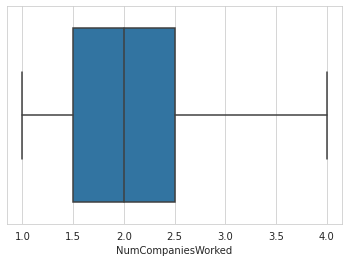

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='NumCompaniesWorked',data=iqr_clean);
plt.show()

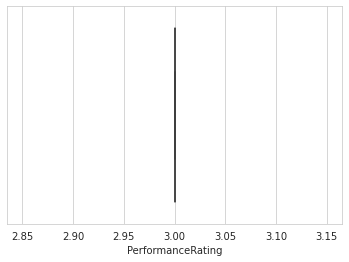

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='PerformanceRating',data=iqr_clean);
plt.show()

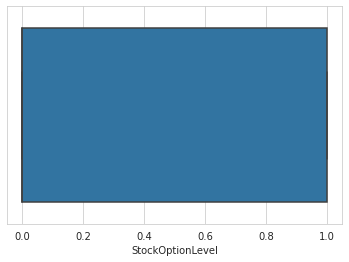

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='StockOptionLevel',data=iqr_clean);
plt.show()

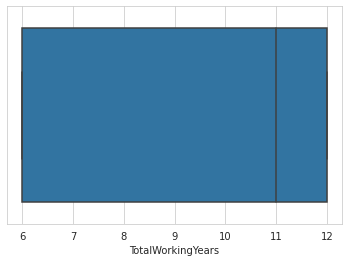

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='TotalWorkingYears',data=iqr_clean);
plt.show()

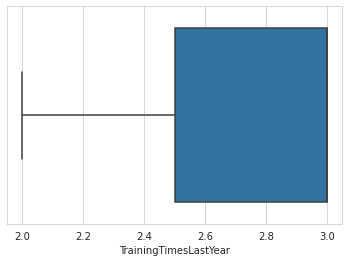

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='TrainingTimesLastYear',data=iqr_clean);
plt.show()

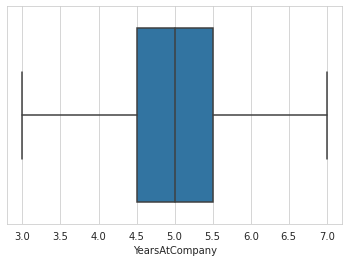

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='YearsAtCompany',data=iqr_clean);
plt.show()

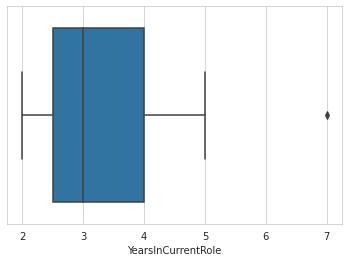

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='YearsInCurrentRole',data=iqr_clean);
plt.show()

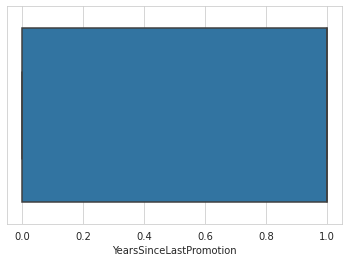

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='YearsSinceLastPromotion',data=iqr_clean);
plt.show()

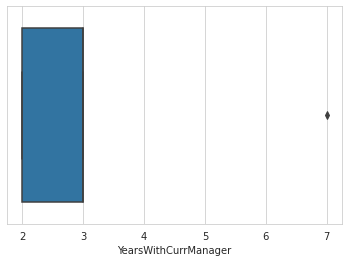

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='YearsWithCurrManager',data=iqr_clean);
plt.show()

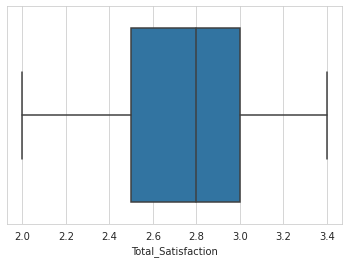

In [ ]:
sns.set_style("whitegrid");
sns.boxplot(x='Total_Satisfaction',data=iqr_clean);
plt.show()

# **Over sampling**

# **Train-Test-Split**

In [ ]:
iqr_clean

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
115,37,0,2,1189,2,3,3,1,87,3,7,2,7428,14506,2,0,12,3,0,12,3,5,3,1,3,2.8
715,33,0,1,827,1,1,4,4,84,2,0,1,5488,20161,1,1,13,3,1,6,2,6,5,1,2,2.6
1227,31,0,2,741,1,2,4,1,69,1,2,1,3477,18103,1,0,14,3,1,6,2,5,2,0,3,3.2
1260,32,0,0,953,1,5,4,5,65,1,6,2,2718,17674,2,0,14,3,0,12,3,7,7,0,7,2.4
1294,41,0,2,447,1,5,3,1,85,2,0,2,6870,15530,3,0,12,3,0,11,3,3,2,1,2,2.0
1299,40,0,2,1194,1,1,3,1,52,2,0,0,6513,9060,4,0,17,3,1,12,3,5,3,0,3,3.4
1469,34,0,2,628,1,8,3,3,82,2,2,1,4404,10228,2,0,12,3,0,6,3,4,3,1,2,2.8


In [ ]:
data2=data1

In [ ]:
data2.shape

(1470, 26)

In [ ]:
data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,1,2,1102,2,1,2,1,94,2,7,2,5993,19479,8,1,11,3,0,8,0,6,4,0,5,2.2
1,49,0,1,279,1,8,1,1,61,2,6,1,5130,24907,1,0,23,4,1,10,3,10,7,1,7,2.8
2,37,1,2,1373,1,2,2,4,92,1,2,2,2090,2396,6,1,15,3,0,7,3,0,0,0,0,2.8
3,33,0,1,1392,1,3,4,1,56,1,6,1,2909,23159,1,1,11,3,0,8,3,8,7,3,0,3.2
4,27,0,2,591,1,2,1,3,40,1,2,1,3468,16632,9,0,12,3,1,6,3,2,2,2,2,2.6


In [ ]:
data2=data2.drop(['Attrition'],axis=1)
data2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,2,1102,2,1,2,1,94,2,7,2,5993,19479,8,1,11,3,0,8,0,6,4,0,5,2.2
1,49,1,279,1,8,1,1,61,2,6,1,5130,24907,1,0,23,4,1,10,3,10,7,1,7,2.8
2,37,2,1373,1,2,2,4,92,1,2,2,2090,2396,6,1,15,3,0,7,3,0,0,0,0,2.8
3,33,1,1392,1,3,4,1,56,1,6,1,2909,23159,1,1,11,3,0,8,3,8,7,3,0,3.2
4,27,2,591,1,2,1,3,40,1,2,1,3468,16632,9,0,12,3,1,6,3,2,2,2,2,2.6


In [ ]:
data2.shape

(1470, 25)

In [ ]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,1,2,1102,2,1,2,1,94,2,7,2,5993,19479,8,1,11,3,0,8,0,6,4,0,5,2.2
1,49,0,1,279,1,8,1,1,61,2,6,1,5130,24907,1,0,23,4,1,10,3,10,7,1,7,2.8
2,37,1,2,1373,1,2,2,4,92,1,2,2,2090,2396,6,1,15,3,0,7,3,0,0,0,0,2.8
3,33,0,1,1392,1,3,4,1,56,1,6,1,2909,23159,1,1,11,3,0,8,3,8,7,3,0,3.2
4,27,0,2,591,1,2,1,3,40,1,2,1,3468,16632,9,0,12,3,1,6,3,2,2,2,2,2.6


In [ ]:
data2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,2,1102,2,1,2,1,94,2,7,2,5993,19479,8,1,11,3,0,8,0,6,4,0,5,2.2
1,49,1,279,1,8,1,1,61,2,6,1,5130,24907,1,0,23,4,1,10,3,10,7,1,7,2.8
2,37,2,1373,1,2,2,4,92,1,2,2,2090,2396,6,1,15,3,0,7,3,0,0,0,0,2.8
3,33,1,1392,1,3,4,1,56,1,6,1,2909,23159,1,1,11,3,0,8,3,8,7,3,0,3.2
4,27,2,591,1,2,1,3,40,1,2,1,3468,16632,9,0,12,3,1,6,3,2,2,2,2,2.6


In [ ]:
x =data2
y =data1.iloc[:,1:2]

In [ ]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,HourlyRate,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction
0,41,2,1102,2,1,2,1,94,2,7,2,5993,19479,8,1,11,3,0,8,0,6,4,0,5,2.2
1,49,1,279,1,8,1,1,61,2,6,1,5130,24907,1,0,23,4,1,10,3,10,7,1,7,2.8
2,37,2,1373,1,2,2,4,92,1,2,2,2090,2396,6,1,15,3,0,7,3,0,0,0,0,2.8
3,33,1,1392,1,3,4,1,56,1,6,1,2909,23159,1,1,11,3,0,8,3,8,7,3,0,3.2
4,27,2,591,1,2,1,3,40,1,2,1,3468,16632,9,0,12,3,1,6,3,2,2,2,2,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,41,2,2,1,2571,12290,4,0,17,3,1,17,3,5,2,0,3,3.4
1466,39,2,613,1,6,1,3,42,3,0,1,9991,21457,4,0,15,3,1,9,5,7,7,1,7,2.2
1467,27,2,155,1,4,3,1,87,2,4,1,6142,5174,1,1,20,4,1,6,0,6,2,0,3,2.6
1468,49,1,1023,2,2,3,3,63,2,7,1,5390,13243,2,0,14,3,0,17,3,9,6,0,8,2.8


In [ ]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 25)
(441, 25)
(1029, 1)
(441, 1)


# **Model Building**

# **Logistic Regression**




In [ ]:
logr=LogisticRegression(max_iter = 500,n_jobs=8)
logr.fit(x_train,y_train)
y_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Attrition
442,0
1091,0
981,1
785,0
1332,1
...,...
817,0
399,0
458,0
406,0


In [ ]:
y_pred_logr=logr.predict(x_test)
y_pred_logr

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_logr)
print(confusion_matrix)

[[366   5]
 [ 58  12]]


In [ ]:
acc_logr=accuracy_score(y_test,y_pred_logr)
acc_logr

0.8571428571428571

In [ ]:
print(classification_report(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.71      0.17      0.28        70

    accuracy                           0.86       441
   macro avg       0.78      0.58      0.60       441
weighted avg       0.84      0.86      0.82       441



# **Support Vector Machine**

In [ ]:
svm=SVC()
svm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm=svm.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix)

[[371   0]
 [ 70   0]]


In [ ]:
acc_svm=accuracy_score(y_test,y_pred_svm)
acc_svm

0.8412698412698413

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **K Nearest Neighbour**

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred_knn)

array([[355,  16],
       [ 65,   5]])

In [ ]:
acc_knn=accuracy_score(y_test,y_pred_knn)
acc_knn

0.8163265306122449

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       371
           1       0.24      0.07      0.11        70

    accuracy                           0.82       441
   macro avg       0.54      0.51      0.50       441
weighted avg       0.75      0.82      0.77       441



# **Naive Bayes**

In [ ]:
#pipe=([('sd',StandardScaler()),
 #      ('knn',KNeighborsClassifier())])
nb=GaussianNB()

nb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb=nb.predict(x_test)
y_pred_nb

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix)

[[301  70]
 [ 29  41]]


In [ ]:
acc_nb=accuracy_score(y_test,y_pred_nb)
acc_nb

0.7755102040816326

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       371
           1       0.37      0.59      0.45        70

    accuracy                           0.78       441
   macro avg       0.64      0.70      0.66       441
weighted avg       0.83      0.78      0.79       441



# **Decision Tree**

In [ ]:
 dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dtc=dtc.predict(x_test)
y_pred_dtc

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_dtc)
print(confusion_matrix)

[[325  46]
 [ 49  21]]


In [ ]:
acc_dtc=accuracy_score(y_test,y_pred_dtc)
acc_dtc

0.7845804988662132

In [ ]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       371
           1       0.31      0.30      0.31        70

    accuracy                           0.78       441
   macro avg       0.59      0.59      0.59       441
weighted avg       0.78      0.78      0.78       441



# **Random Forest**

In [ ]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [ ]:
rfc=RandomForestClassifier(**rf_params)
rfc.fit(smote_train,smote_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfc=dtc.predict(x_test)
y_pred_rfc

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix)

[[325  46]
 [ 49  21]]


In [ ]:
acc_rfc=accuracy_score(y_test,y_pred_rfc)
acc_rfc

0.7845804988662132

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       371
           1       0.31      0.30      0.31        70

    accuracy                           0.78       441
   macro avg       0.59      0.59      0.59       441
weighted avg       0.78      0.78      0.78       441



# **Accuracies Of Models**

In [ ]:
print(acc_logr*100)
print(acc_svm*100)
print(acc_knn*100)
print(acc_nb*100)
print(acc_dtc*100)
print(acc_rfc*100)

85.71428571428571
84.12698412698413
81.63265306122449
77.55102040816327
78.45804988662131
78.45804988662131


# **Pickle File**

In [ ]:
import pickle
pickle.dump(logr,open('Attrition.pkl','wb'))